# Schedule as a cumulative bar chart

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import datetime

## Define functions

In [2]:
def plot_hours_per_day(df_inp, figure_path):
    # skip the first column with task names
    df = df_inp.iloc[:, 1:]
    hours_per_day = df.sum()
    
    date_format = "%Y-%m-%d"
    x_day = (pd.to_datetime(hours_per_day.index, format=date_format)).to_list()
    y_hours_per_day = (hours_per_day.array).tolist()

    fig, ax = plt.subplots()
    ax.set_ylabel('Hours')
    ax.set_title('Hours per day')
    ax.yaxis.set_major_locator(tck.MultipleLocator(1))
    #ax.xaxis.set_major_locator(tck.MaxNLocator(5, integer=True, steps=[1, 2, 4, 5, 10]))
    ax.step(x_day, y_hours_per_day, color='tab:green')
    ax.fill_between(x_day, 0, y_hours_per_day, hatch='/', alpha=0.2, color='#90EE90')
    ax.yaxis.grid(alpha=0.5)
    ax.set_axisbelow(True)
    ax.set_ylim(bottom=0)
    ax.set_xlim([x_day[0], x_day[-1]])
    ax.tick_params(axis='x', labelsize='small')
    fig.set_size_inches(8, 6)
    plt.savefig(figure_path, bbox_inches="tight", dpi = 100)
    # plt.close()

In [3]:
def plot_tasks_per_day(df_inp, figure_path):
    # skip the first column with task names
    df = df_inp.iloc[:, 1:]
    tasks_per_day = (df > 0).sum()
    
    date_format = "%Y-%m-%d"
    x_day = (pd.to_datetime(tasks_per_day.index, format=date_format)).to_list()
    y_tasks_per_day = (tasks_per_day.array).tolist()

    fig, ax = plt.subplots()
    ax.set_ylabel('Tasks')
    ax.set_title('Tasks per day')
    ax.yaxis.set_major_locator(tck.MultipleLocator(1))
    # ax.xaxis.set_major_locator(tck.MaxNLocator(5, integer=True, steps=[1, 2, 4, 5, 10]))
    ax.step(x_day, y_tasks_per_day, color='tab:blue')
    ax.fill_between(x_day, 0, y_tasks_per_day, hatch='\\', alpha=0.2, color='#ADD8E6')
    ax.yaxis.grid(alpha=0.5)
    ax.set_axisbelow(True)
    ax.set_ylim(bottom=0)
    ax.set_xlim([x_day[0], x_day[-1]])
    ax.tick_params(axis='x', labelsize='small')
    fig.set_size_inches(8, 6)
    plt.savefig(figure_path, bbox_inches="tight", dpi = 100)
    # plt.close()

In [4]:
def get_date_format():
    return "%Y-%m-%d"
    
def string_to_date(d):
    return datetime.datetime.strptime(d, get_date_format()).date()
    
def number_of_days_between(str1, str2):
    d1 = string_to_date(str1)
    d2 = string_to_date(str2)
    return (d2 - d1).days + 1

In [5]:
def plot_tasks_per_day_stacked(df, figure_path, start_day, end_day):
    days = pd.date_range(start=start_day, end=end_day, freq="D")
    bottom = np.zeros(number_of_days_between(start_day, end_day))

    width = 1.0
    fig, ax = plt.subplots()
    for idx in df.index:
        task = df.loc[idx, days.astype("str")]
        if task.sum() > 0:
            rects = ax.bar(days, task, width, label="{name}".format(name=df.iat[idx, 0]), bottom=bottom)
            bottom += task

    ax.set_ylabel('Hours')
    ax.xaxis.set_major_locator(tck.MaxNLocator(5, integer=True, steps=[1, 2, 7]))
    # ax.set_xlim([days[0], days[-1]])
    ax.tick_params(axis='x', labelsize='small')
    ax.yaxis.set_major_locator(tck.MultipleLocator(1))
    ax.set_ylim(0)
    ax.legend(loc="upper right")
    ax.yaxis.grid(alpha=0.4)
    ax.set_axisbelow(True)
    fig.set_size_inches(8, 6)
    plt.savefig(figure_path, bbox_inches="tight", dpi = 100)
    # plt.close()

    

## Complete planing horizon. Case A

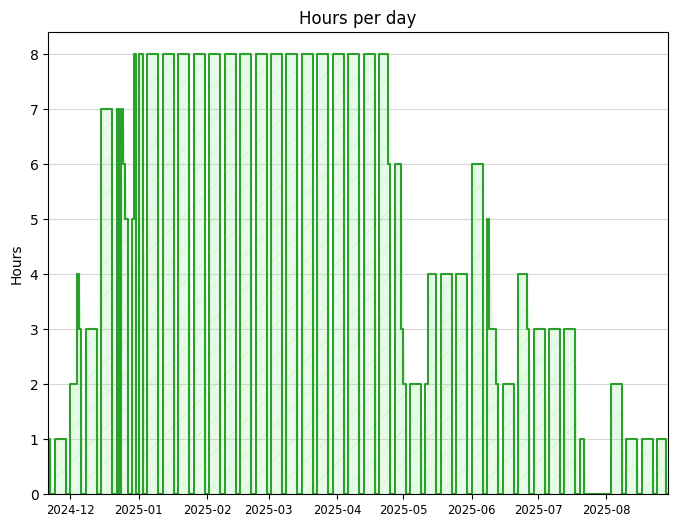

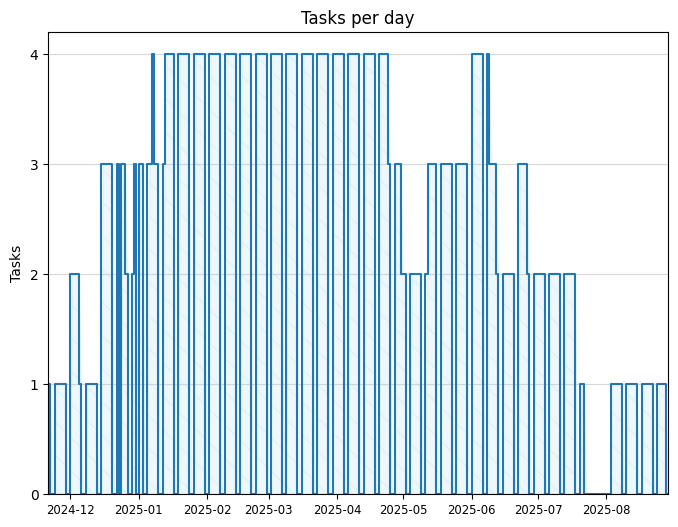

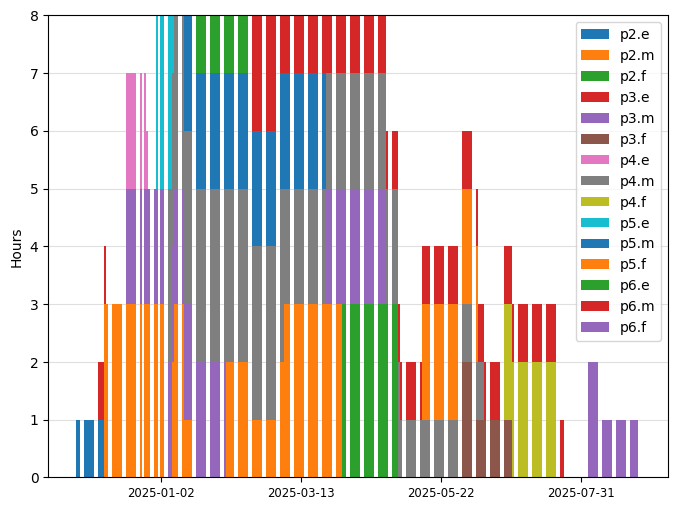

In [6]:
df = pd.read_csv("./input/schedule_a.csv")
plot_hours_per_day(df, "./output/hours_a.png")
plot_tasks_per_day(df, "./output/tasks_a.png")
plot_tasks_per_day_stacked(df, "./output/stacked_a.png", df.columns[1], df.columns[-1])

## Complete planing horizon. Case B

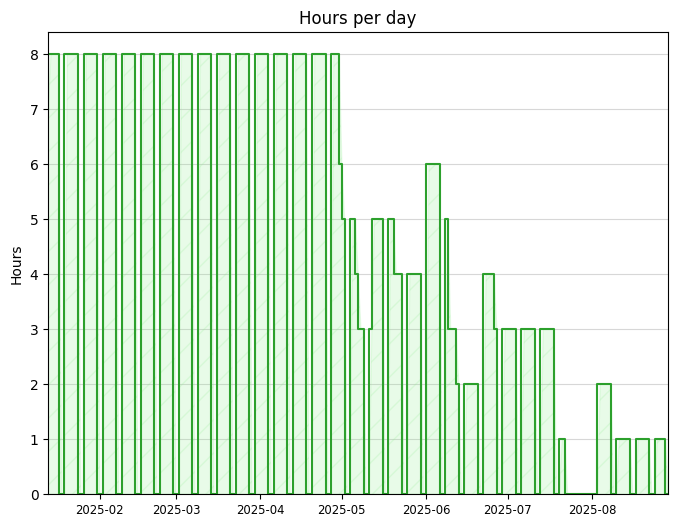

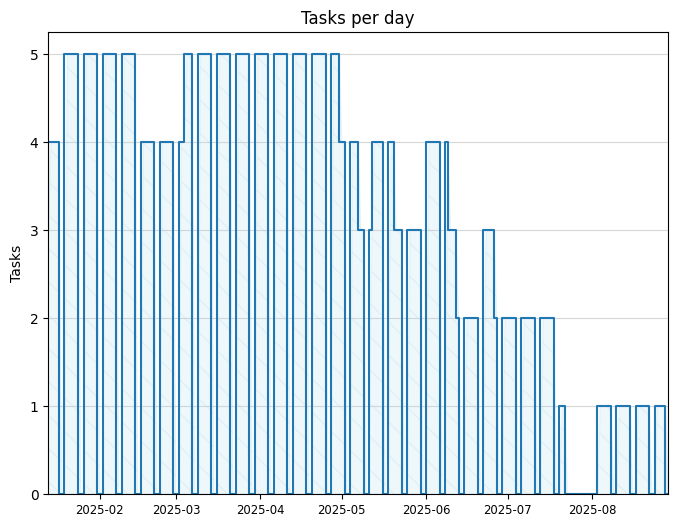

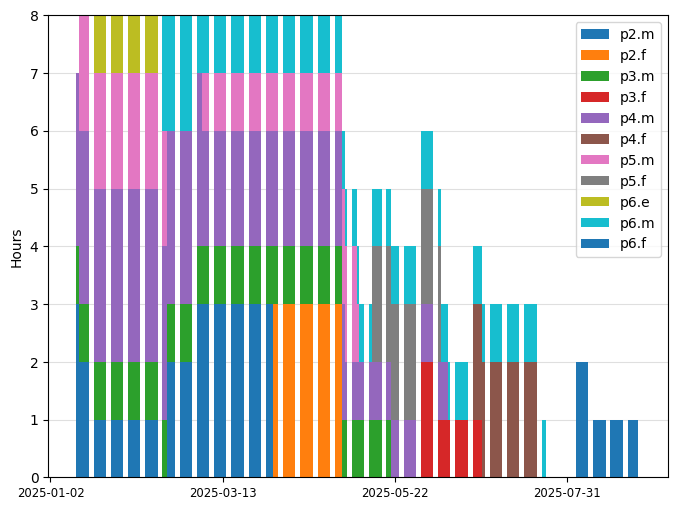

In [10]:
df = pd.read_csv("./input/schedule_b.csv")
plot_hours_per_day(df, "./output/hours_b.png")
plot_tasks_per_day(df, "./output/tasks_b.png")
plot_tasks_per_day_stacked(df, "./output/stacked_b.png", df.columns[1], df.columns[-1])